In [2]:
!pip install quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl  as qd

Defaulting to user installation because normal site-packages is not writeable


In [3]:
np.random.seed(777)

# Configure Quandl API key
qd.ApiConfig.api_key = 'VayqJtGizxLDseKU-bxE'

In [4]:
stocks = ['AAPL', 'AMZN', 'FB']

# Fetch historical stock price data using Quandl
data = qd.get_table('WIKI/PRICES', ticker=stocks,
                        date={'gte': '2016-01-01', 'lte': '2017-12-31'}, paginate=True)

In [5]:
data

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,FB,2017-12-29,178.00,178.8500,176.46,176.46,10028758.0,0.0,1.0,178.000000,178.850000,176.460000,176.460000,10028758.0
1,FB,2017-12-28,177.95,178.9367,177.68,177.92,11008996.0,0.0,1.0,177.950000,178.936700,177.680000,177.920000,11008996.0
2,FB,2017-12-27,176.55,178.4400,176.26,177.62,9296258.0,0.0,1.0,176.550000,178.440000,176.260000,177.620000,9296258.0
3,FB,2017-12-26,176.63,177.0000,174.67,175.99,8726829.0,0.0,1.0,176.630000,177.000000,174.670000,175.990000,8726829.0
4,FB,2017-12-22,177.14,177.5300,176.23,177.20,8462491.0,0.0,1.0,177.140000,177.530000,176.230000,177.200000,8462491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,AAPL,2016-01-08,98.55,99.1100,96.76,96.96,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0
1500,AAPL,2016-01-07,98.68,100.1300,96.43,96.45,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
1501,AAPL,2016-01-06,100.56,102.3700,99.87,100.70,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0


In [6]:
data.set_index('date', inplace=True)
data

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2017-12-29,FB,178.00,178.8500,176.46,176.46,10028758.0,0.0,1.0,178.000000,178.850000,176.460000,176.460000,10028758.0
2017-12-28,FB,177.95,178.9367,177.68,177.92,11008996.0,0.0,1.0,177.950000,178.936700,177.680000,177.920000,11008996.0
2017-12-27,FB,176.55,178.4400,176.26,177.62,9296258.0,0.0,1.0,176.550000,178.440000,176.260000,177.620000,9296258.0
2017-12-26,FB,176.63,177.0000,174.67,175.99,8726829.0,0.0,1.0,176.630000,177.000000,174.670000,175.990000,8726829.0
2017-12-22,FB,177.14,177.5300,176.23,177.20,8462491.0,0.0,1.0,177.140000,177.530000,176.230000,177.200000,8462491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,AAPL,98.55,99.1100,96.76,96.96,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0
2016-01-07,AAPL,98.68,100.1300,96.43,96.45,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-06,AAPL,100.56,102.3700,99.87,100.70,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0


In [7]:
data_pivot = data.pivot(columns='ticker', values='adj_close')
data_pivot 

ticker,AAPL,AMZN,FB
date,,,
2016-01-04,101.783763,636.99,102.22
2016-01-05,99.233131,633.79,102.73
2016-01-06,97.291172,632.65,102.97
2016-01-07,93.185040,607.94,97.92
2016-01-08,93.677776,607.05,97.33
...,...,...,...
2017-12-22,175.010000,1168.36,177.20
2017-12-26,170.570000,1176.76,175.99
2017-12-27,170.600000,1182.26,177.62


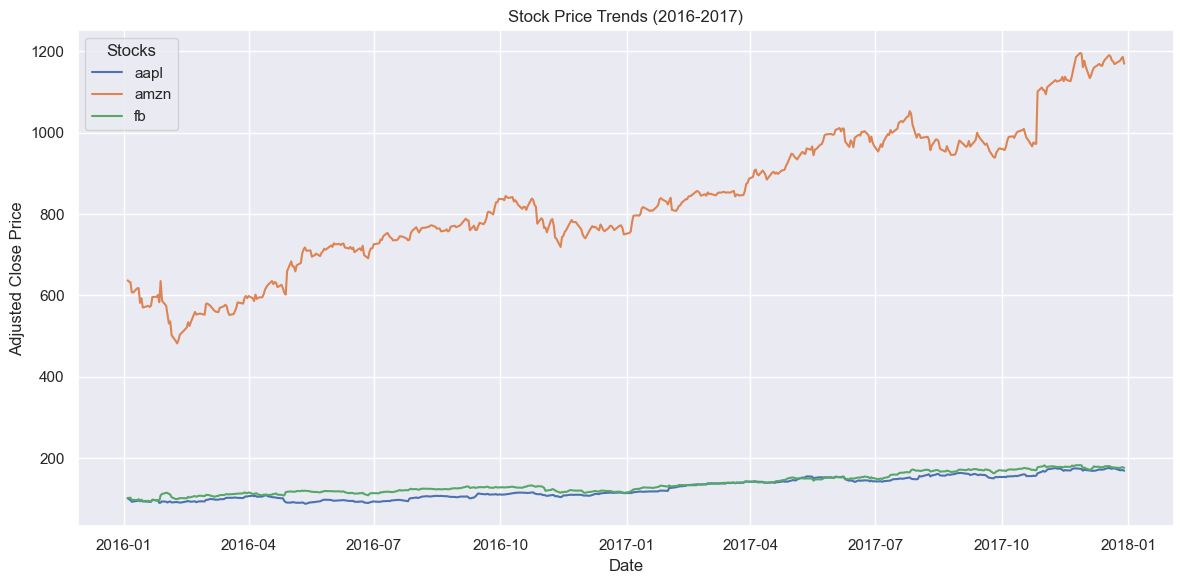

In [8]:
# Adjust column names to display only stock names
data_pivot.columns = [col.lower() for col in data_pivot.columns]

# Create a line plot to visualize stock price trends
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
sns.lineplot(data=data_pivot, dashes=False)
plt.title('Stock Price Trends (2016-2017)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(title='Stocks', loc='upper left')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Sample_fig.png')

# Show the plot
plt.show()

In [9]:
for i in [
    ['petal_length', 'petal_width', 'num_lineplot',
        'num_lineplot.png', sns.scatterplot],
    ['petal_length', 'petal_width', 'num_scatterplot',
        'num_scatterplot.png', sns.scatterplot],
    ['petal_length', 'petal_width', 'num_regplot', 'num_regplot.png', sns.regplot],
    ['petal_length', 'petal_width', 'num_regplot',
        'num_jointplot.png', sns.jointplot],
    ['species_types', 'petal_width', 'cantum_barplot',
        'cantom_barplot.png', sns.barplot],
    ['species_types', 'petal_width', 'cantum_pointplot',
        'cantom_pointplot.png', sns.pointplot],
    ['species_types', 'petal_width', 'cantum_boxplot',
        'cantom_boxplot.png', sns.boxplot],
    ['species_types', 'petal_width', 'cantum_violinplot',
        'cantom_violinplot.png', sns.violinplot],
    ['species_types', 'petal_width', 'cantum_stripplot',
        'cantom_stripplot.png', sns.stripplot],
    ['species_types', 'petal_width', 'cantum_swarmplot',
        'cantom_swarmplot.png', sns.swarmplot],
]:
    func(*i)

NameError: name 'func' is not defined